## QUESTION 2



In [89]:
import numpy as np  #module for maths capabilities
np.random.seed(1000)
import scipy.stats as scs   #for some probability capabilities
import matplotlib as mpl
import matplotlib.pyplot as plt  #module for plotting
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

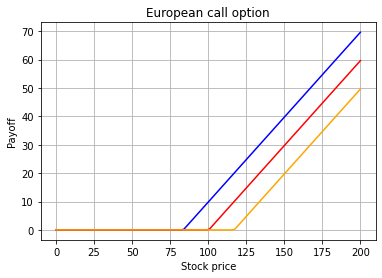

In [90]:
#We define function for payoff of given strike price
def payoff(N):
    payf = [] #initiate payoff
    stockp= np.linspace(0,200,200)  #setting list of stock price
    for i in range(120):   #begin for loop
        if N >= stockp[i]:  #if N less than or equal stock, the program updates 0 to the payoff, otherwise calculate difference
            payf.append(0)
        else:
            payf.append(stockp[i]-N)
    return payf
#plot of the payoff for a portfolio P
X= np.linspace(0,200,120)  #X values are stock price
                          #Y values are payoff from corresponding strike
plt.title('European call option')
plt.ylabel('Payoff')
plt.xlabel('Stock price')
plt.plot(X,payoff(50), color = 'blue') #Opt1
plt.plot(X,payoff(60), color = 'red')  #Opt2
plt.plot(X,payoff(70), color = 'orange') #Opt3
plt.grid()
plt.show()


**QUESTION 6**

In [91]:
!pip3 install yfinance --upgrade
#instatlling yahoo financial data module

In [92]:
def print_statistics(array):  
    ''' Prints selected statistics.
    Parameters
    ==========
    array: ndarray       (object to generate statistics on)
    '''
    sta = scs.describe(array)
    print ("%14s %15s" % ('statistic', 'value'))
    print (30 * "-")
    print ("%14s %15.5f" % ('size', sta[0]))
    print ("%14s %15.5f" % ('min', sta[1][0]))
    print ("%14s %15.5f" % ('max', sta[1][1]))
    print ("%14s %15.5f" % ('mean', sta[2]))
    print ("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print ("%14s %15.5f" % ('skew', sta[4]))
    print ("%14s %15.5f" % ('kurtosis', sta[5]))


In [93]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
    Parameters
    ==========
    array: ndarray
    object to generate statistics on
    '''
    print ("Skew of data set %14.3f" % scs.skew(arr))
    print ("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print ("Kurt of data set %14.3f" % scs.kurtosis(arr))
    print ("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print ("Norm test p-value %14.3f" % scs.normaltest(arr)[1])

## (i) Download Adj Close stock data from the beginning of 2004 to the present time from Yahoo.

In [94]:
import yfinance as yf   #module for fincial cababilities
dta=yf.download ("AMZN",start="2004-01-01",end="2022-03-05")

[*********************100%***********************]  1 of 1 completed


In [95]:
import pandas as pd
close=dta['Adj Close']
data=pd.DataFrame(close.values,columns=['amazon'])  # data is now a pandas object
data.index=close.index

In [96]:
data.head()

,amazon
Date,
2004-01-02,51.900002
2004-01-05,53.270000
2004-01-06,53.029999
2004-01-07,51.900002
2004-01-08,50.240002


### (ii) Calculate the returns. Plot stock prices, and log returns.

,amazon
Date,
2004-01-02,NaN
2004-01-05,0.026055
2004-01-06,-0.004516
2004-01-07,-0.021539
2004-01-08,-0.032507


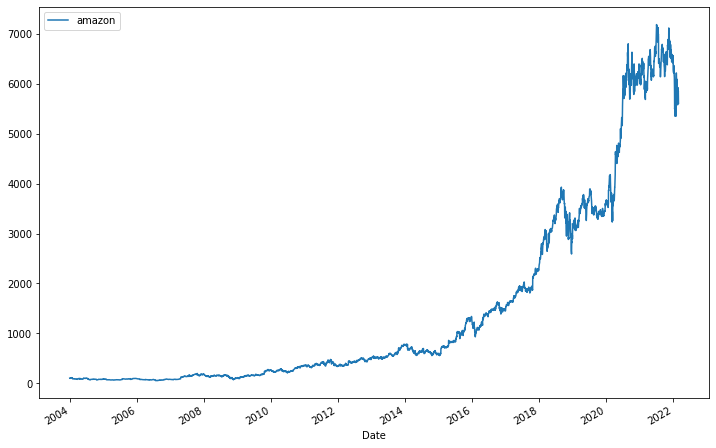

In [97]:
import numpy as np
(data / data.iloc[0] * 100).plot(figsize=(12,8))   # takes care of all plotting functions in pandas
log_returns = np.log(data / data.shift(1))
log_returns.head()

In [98]:
data=data.dropna(axis=0,how='any')    # how='all' drps only complete rows of NA, how='any' drops all rows containing an NA
data.head()

,amazon
Date,
2004-01-02,51.900002
2004-01-05,53.270000
2004-01-06,53.029999
2004-01-07,51.900002
2004-01-08,50.240002


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f42587d3250>],
      dtype=object)

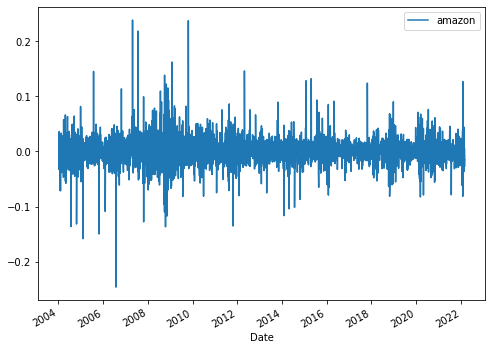

In [99]:
log_returns.plot(subplots=True,figsize=(8, 6))  #log return plot

### (iii) Plot the histogram of Google returns and the normal distribution with the same mean and variance.

------------------------------
     statistic           value
------------------------------
          size      4574.00000
           min        -0.24618
           max         0.23862
          mean         0.00088
           std         0.02390
          skew         0.34654
      kurtosis        13.54457


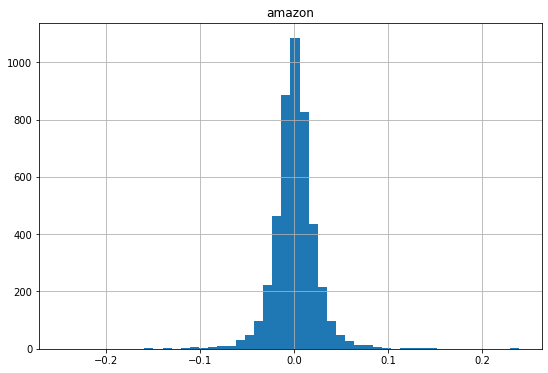

In [100]:
log_returns.hist(bins=50, figsize=(9, 6))
print (30 * "-")
log_data = np.array(log_returns.dropna())
print_statistics(log_data)

### (iv) Test normality through qqplot.

In [101]:
import scipy.stats as scs #module to be able to access qqplot package

--------------------------------
Skew of data set          0.347
Skew test p-value          0.000
Kurt of data set         13.545
Kurt test p-value          0.000
Norm test p-value          0.000


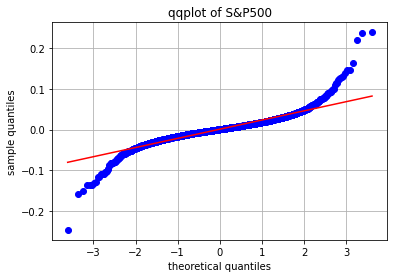

In [102]:
scs.probplot(log_returns['amazon'].dropna(),plot=plt,fit=True)
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
plt.title('qqplot of S&P500')
print (32 * "-")
log_data = np.array(log_returns.dropna())
normality_tests(log_data)

### (v)  Volatility of Amazon  



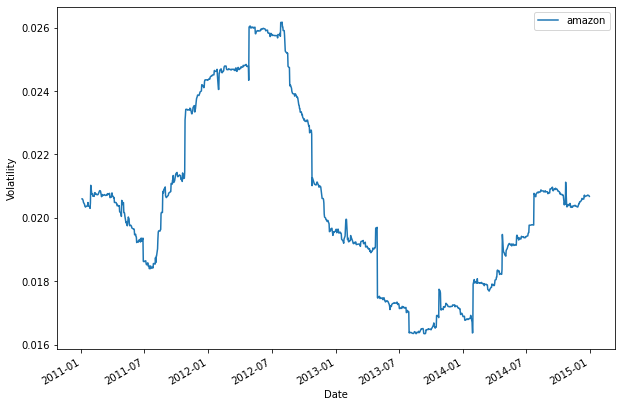

In [103]:
AMAZON5 = data.loc['2010-01-01':'2015/01/01'] 
returns = np.log(AMAZON5 /AMAZON5.shift())
vol= returns.rolling(window=252).std()
fig = plt.figure(figsize=(10, 7))
ax1 = fig.add_subplot(1, 1, 1)
vol.plot(ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Volatility')
plt.show()

### (vi)  Plot autocorrelation functions  


Text(0.5, 1.0, 'Autocorrelations of Log-returns of S&P500')

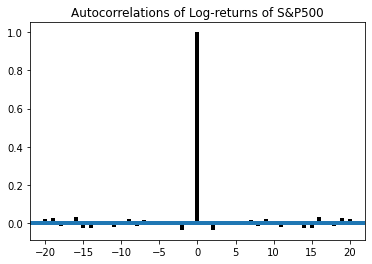

In [104]:
plt.acorr(log_returns['amazon'].dropna(), maxlags=20,lw=4)
plt.title('Autocorrelations of Log-returns of S&P500')